In this file I am going to do EDA and Add some more features to our dataset.
EDA & Feature Engineering notebook.

DATA IS FROM KAGGLE:

https://www.kaggle.com/datasets/imranbukhari/comprehensive-ethusd-1m-data

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go # for Candlestick chart

In [ ]:
start_df = pd.read_csv('..\main_data\ETHUSD_1m_Binance.csv', 
                       parse_dates=['Open time'])

In [55]:
start_df.set_index('Open time', inplace=True)  # Set as index
start_df.head()

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,,,,,,,,,,,
2017-08-17 04:00:00,301.13,301.13,301.13,301.13,0.42643,2017-08-17 04:00:59.999,128.410866,2.0,0.42643,128.410866,0.0
2017-08-17 04:01:00,301.13,301.13,301.13,301.13,2.75787,2017-08-17 04:01:59.999,830.477393,4.0,2.75787,830.477393,0.0
2017-08-17 04:02:00,300.00,300.00,300.00,300.00,0.09930,2017-08-17 04:02:59.999,29.790000,2.0,0.09930,29.790000,0.0
2017-08-17 04:03:00,300.00,300.00,300.00,300.00,0.31389,2017-08-17 04:03:59.999,94.167000,3.0,0.00000,0.000000,0.0
2017-08-17 04:04:00,301.13,301.13,301.13,301.13,0.23202,2017-08-17 04:04:59.999,69.868183,1.0,0.23202,69.868183,0.0


In [56]:
len(start_df)

3920412

In [57]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3920412 entries, 2017-08-17 04:00:00 to NaT
Data columns (total 11 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Open                          float64
 1   High                          float64
 2   Low                           float64
 3   Close                         float64
 4   Volume                        float64
 5   Close time                    object 
 6   Quote asset volume            float64
 7   Number of trades              float64
 8   Taker buy base asset volume   float64
 9   Taker buy quote asset volume  float64
 10  Ignore                        float64
dtypes: float64(10), object(1)
memory usage: 358.9+ MB


'We will not take into account columns like "Quote asset volume", "Number of trades",  
"Taker buy base asset volume", "Taker buy quote asset volume", "Ignore".  
So just drop this list.  
Also, we have one date-time data, that is enough, so drop "Close time" as well.'

In [58]:
to_drop = ['Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']

In [59]:
full_df = start_df.drop(to_drop, axis=1)

In [60]:
full_df

,Open,High,Low,Close,Volume
Open time,,,,,
2017-08-17 04:00:00,301.13,301.13,301.13,301.13,0.42643
2017-08-17 04:01:00,301.13,301.13,301.13,301.13,2.75787
2017-08-17 04:02:00,300.00,300.00,300.00,300.00,0.09930
2017-08-17 04:03:00,300.00,300.00,300.00,300.00,0.31389
2017-08-17 04:04:00,301.13,301.13,301.13,301.13,0.23202
...,...,...,...,...,...
2025-02-04 15:59:00,2776.99,2779.50,2773.91,2777.18,453.64560
2025-02-04 16:00:00,2777.18,2783.06,2777.18,2783.06,1167.31820
2025-02-04 16:01:00,2783.05,2783.69,2777.32,2779.43,716.56790


### Now, we need to decide how much lines of data
### we want to keep.

<img src="DATA\ETHUSDT_2025-03-29_19-50-19.png" alt="Alternative text" />

In the picture above we have an ETH graph displayed,  
with a little bit of my notes, please look through them.  
I ended up with **145 latest days** in our dataset  
that we will manipulate.  
  
 That is going to be **a little more than 200 thousand** lines to work with.      
  
  (_208800 lines_)

In [61]:
# taking the time period that we disscused for full dataset
start_time = '2024-09-12 16:02:00'
index_start=full_df.index.get_loc(start_time)
end_time = '2025-02-04 16:02:00'
index_end=full_df.index.get_loc(end_time)

# We also might need timeperiod for vizualization
plot_period = slice('2025-02-04 13:02:00','2025-02-04 16:02:00') # Selectio Plot Period for visualisation only
start_time_viz = '2025-02-04 13:02:00'

In [62]:
#We can finally get our desired dataset
df=full_df.iloc[index_start:index_end]
df.head()

,Open,High,Low,Close,Volume
Open time,,,,,
2024-09-12 16:02:00,2323.59,2326.78,2323.58,2326.78,91.7050
2024-09-12 16:03:00,2326.77,2327.04,2326.20,2326.82,113.4817
2024-09-12 16:04:00,2326.83,2327.46,2326.82,2327.46,131.0081
2024-09-12 16:05:00,2327.46,2328.05,2325.60,2325.66,140.2757
2024-09-12 16:06:00,2325.66,2328.53,2325.52,2328.05,111.2175


In [63]:
df.tail()

,Open,High,Low,Close,Volume
Open time,,,,,
2025-02-04 15:57:00,2785.52,2785.64,2778.39,2780.60,640.9539
2025-02-04 15:58:00,2780.60,2780.60,2775.13,2777.00,591.4287
2025-02-04 15:59:00,2776.99,2779.50,2773.91,2777.18,453.6456
2025-02-04 16:00:00,2777.18,2783.06,2777.18,2783.06,1167.3182
2025-02-04 16:01:00,2783.05,2783.69,2777.32,2779.43,716.5679


In [64]:
len(df)

208800

## Adding a target variable - 'Signal'

To build an effective trading strategy,   
I needed to define a *target variable*   
that would indicate whether the model should   
take a **buy or sell** position.   
I focused on using price-based indicators to generate signals.  


##### Initial Approach: Moving Average Crossovers  

I first considered using **Simple Moving Averages (SMA) to define trading signals**. The idea was to use two SMAs:  

- SMA1 (Short-term, 10-period)  

- SMA2 (Long-term, 60-period)  

A Buy (1) signal was triggered when SMA1 > SMA2, and a Sell (0) signal when SMA1 < SMA2.  
However, after testing, I found this approach to be **too slow for high-frequency Ethereum trading (1-minute scale)**  
 and prone to false signals in fast market conditions.

--------------------------------------------------------------------------------------------------------------------------

#### But after some more testing and surfing through different strategies, 
#### I think I found an optimal one:
  
Primary Indicator: **MACD** (to detect trend direction and momentum).  


#### Selecting Moving Averages
I chose the following moving averages to track momentum shifts:

- **Short-Term EMA: 8-period EMA**

- **Medium-Term EMA: 21-period EMA**

- **MACD Signal Line: 5-period EMA of the MACD**  

This combination allowed me to capture momentum while reducing excessive noise.



Example of how important to take this exact windows for EMAs:
<img src="DATA\ETHUSDT_2025-04-03_04-16-29.png" alt="Alternative text" />


**Example of how the strategy predicts:**

<img src="DATA\ETHUSDT_2025-04-03_04-33-08.png" alt="Alternative text" />


In [65]:
# Calculate MACD (8, 21, 5)
def calculate_macd(df, short_ema=8, long_ema=21, signal_smoothing=5):
    df['EMA_8'] = df['Close'].ewm(span=short_ema, adjust=False).mean()
    df['EMA_21'] = df['Close'].ewm(span=long_ema, adjust=False).mean()
    df['MACD'] = df['EMA_8'] - df['EMA_21']
    df['Signal_Line_EMA_5'] = df['MACD'].ewm(span=signal_smoothing, adjust=False).mean()
    return df

# Apply indicator
df_w_macd= calculate_macd(df, short_ema=8, long_ema=21, signal_smoothing=5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23728\2862860130.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23728\2862860130.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23728\2862860130.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [66]:
df_w_macd.head()

,Open,High,Low,Close,Volume,EMA_8,EMA_21,MACD,Signal_Line_EMA_5
Open time,,,,,,,,,
2024-09-12 16:02:00,2323.59,2326.78,2323.58,2326.78,91.7050,2326.780000,2326.780000,0.000000,0.000000
2024-09-12 16:03:00,2326.77,2327.04,2326.20,2326.82,113.4817,2326.788889,2326.783636,0.005253,0.001751
2024-09-12 16:04:00,2326.83,2327.46,2326.82,2327.46,131.0081,2326.938025,2326.845124,0.092901,0.032134
2024-09-12 16:05:00,2327.46,2328.05,2325.60,2325.66,140.2757,2326.654019,2326.737385,-0.083366,-0.006366
2024-09-12 16:06:00,2325.66,2328.53,2325.52,2328.05,111.2175,2326.964237,2326.856714,0.107523,0.031597


In [67]:
df_w_macd.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume               0
EMA_8                0
EMA_21               0
MACD                 0
Signal_Line_EMA_5    0
dtype: int64

In [68]:
# Define conditions for buy, sell, and no action
# If the lines are equal, we will mark it as a 'Buy' signal

buy_signal = (df_w_macd['MACD'] >= df_w_macd['Signal_Line_EMA_5'])
sell_signal = (df_w_macd['MACD'] < df_w_macd['Signal_Line_EMA_5'])
 

# Assign Buy (1) and Sell (0) signals
df_w_macd.loc[buy_signal, 'Target_Signal'] = 1
df_w_macd.loc[sell_signal, 'Target_Signal'] = 0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23728\3403144287.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
df_w_macd.head()

,Open,High,Low,Close,Volume,EMA_8,EMA_21,MACD,Signal_Line_EMA_5,Target_Signal
Open time,,,,,,,,,,
2024-09-12 16:02:00,2323.59,2326.78,2323.58,2326.78,91.7050,2326.780000,2326.780000,0.000000,0.000000,1.0
2024-09-12 16:03:00,2326.77,2327.04,2326.20,2326.82,113.4817,2326.788889,2326.783636,0.005253,0.001751,1.0
2024-09-12 16:04:00,2326.83,2327.46,2326.82,2327.46,131.0081,2326.938025,2326.845124,0.092901,0.032134,1.0
2024-09-12 16:05:00,2327.46,2328.05,2325.60,2325.66,140.2757,2326.654019,2326.737385,-0.083366,-0.006366,0.0
2024-09-12 16:06:00,2325.66,2328.53,2325.52,2328.05,111.2175,2326.964237,2326.856714,0.107523,0.031597,1.0


In [70]:
# Check the distribution of signals
df_w_macd['Target_Signal'].value_counts() /  len(df_w_macd) * 100

Target_Signal
0.0    50.385057
1.0    49.614943
Name: count, dtype: float64

In [71]:
df_w_macd['Prise_Direction'] = (df_w_macd['Close'] > df_w_macd['Open']).astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23728\4105842933.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



---------------------------------------------------------

### A little bit of visuals)

In [72]:
# Create a DataFrame for visualization
index_viz=df_w_macd.index.get_loc(start_time_viz)
df_viz = df_w_macd.iloc[index_viz:]  

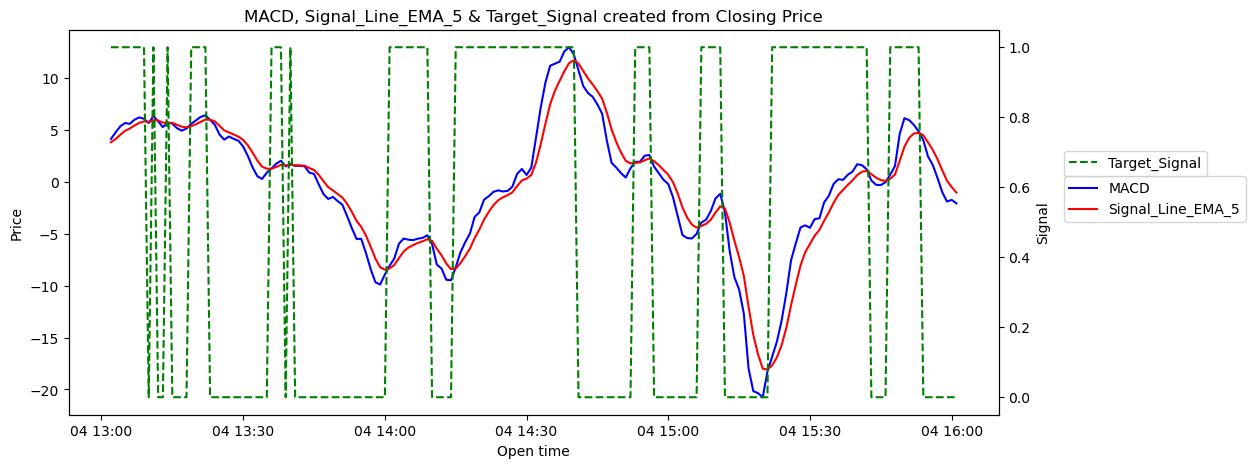

In [73]:
plt.figure(figsize=(12, 5))

sns.lineplot(x=df_viz.index, y=df_viz['MACD'], label="MACD", color='blue')
sns.lineplot(x=df_viz.index, y=df_viz['Signal_Line_EMA_5'], label="Signal_Line_EMA_5", color='red')

ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot(x=df_viz.index, y=df_viz['Target_Signal'], ax=ax2, label="Target_Signal", color='green', linestyle="dashed")

# Labels and title
ax.set_ylabel("Price")
ax2.set_ylabel("Signal")
plt.title("MACD, Signal_Line_EMA_5 & Target_Signal created from Closing Price")

# Display legend
ax.legend(loc=(1.07,0.5))
ax2.legend(loc=(1.07,0.62))

plt.show()

Text(0, 0.5, 'Count')

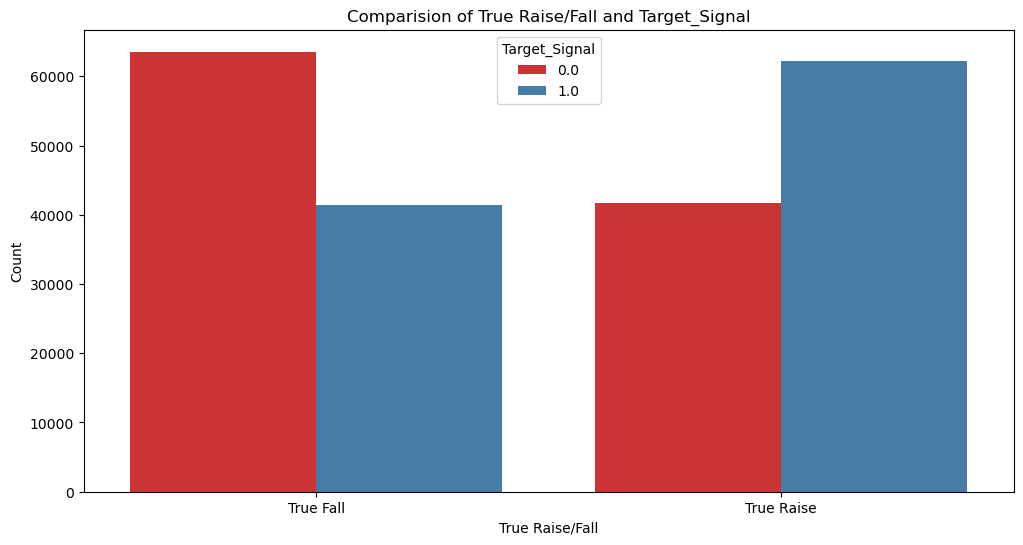

In [74]:
plt.figure(figsize=(12, 6))
plt.title('Comparision of True Raise/Fall and Target_Signal')
sns.countplot(data=df_w_macd, x='Prise_Direction', hue='Target_Signal', palette='Set1')
plt.xticks([0, 1], ['True Fall', 'True Raise'])
plt.xlabel('True Raise/Fall')
plt.ylabel('Count')

In [75]:
fig = go.Figure()

# Add candlestick chart
fig.add_trace(go.Candlestick(
    x=df_viz.index,
    open=df_viz['Open'],
    high=df_viz['High'],
    low=df_viz['Low'],
    close=df_viz['Close'],
    name='Candlestick'
))

# Add Buy signals (Green Up Arrows)
plt.figure(figsize=(12, 5))
fig.add_trace(go.Scatter(
    x=df_viz[df_viz['Target_Signal'] == 1].index,
    y=df_viz[df_viz['Target_Signal'] == 1]['Low'] * 0.98,  # Position slightly below Low
    mode='markers',
    marker=dict(symbol='triangle-up', color='green', size=12),
    name='Buy Signal'
))

# Add Sell signals (Red Down Arrows)
fig.add_trace(go.Scatter(
    x=df_viz[df_viz['Target_Signal'] == 0].index,
    y=df_viz[df_viz['Target_Signal'] == 0]['High'] * 1.02,  # Position slightly above High
    mode='markers',
    marker=dict(symbol='triangle-down', color='red', size=12),
    name='Sell Signal'
))

fig.update_layout(title="ETH Target Signals (Only 3 hours of data (full dataset is 145 days))",
                  xaxis_title="Time",
                  yaxis_title="Price",
                  xaxis_rangeslider_visible=False)

fig.show()

<Figure size 1200x500 with 0 Axes>

##### Let's see how our *Base features* correlate with 'Target Signal'  
By *Base features* I mean: open,high,low,close,volumes

In [76]:
# DataFrame full_df has only base columns, so we can add Target_Signal and find correlations
full_df['Target_Signal'] = df_w_macd['Target_Signal']

Text(0.5, 1.0, 'Correlation Matrix of Base Columns with Target_Signal')

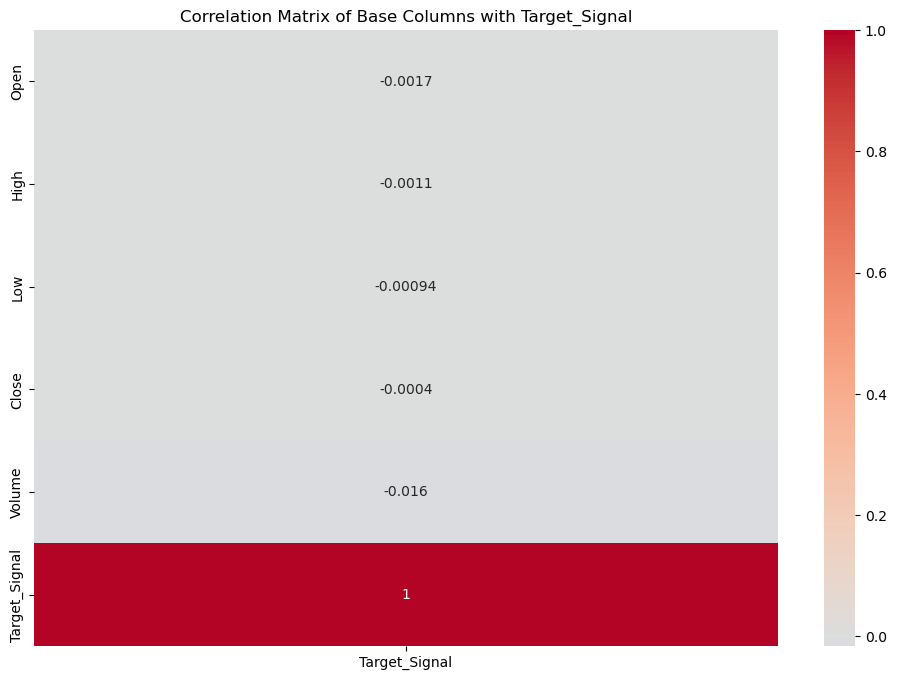

In [77]:
# Correlation of only Target_Signal with other columns
plt.figure(figsize=(12, 8))
sns.heatmap(full_df.corr()[['Target_Signal']], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Base Columns with Target_Signal')

Text(0.5, 1.0, 'Correlation Matrix of All current Columns with Target_Signal')

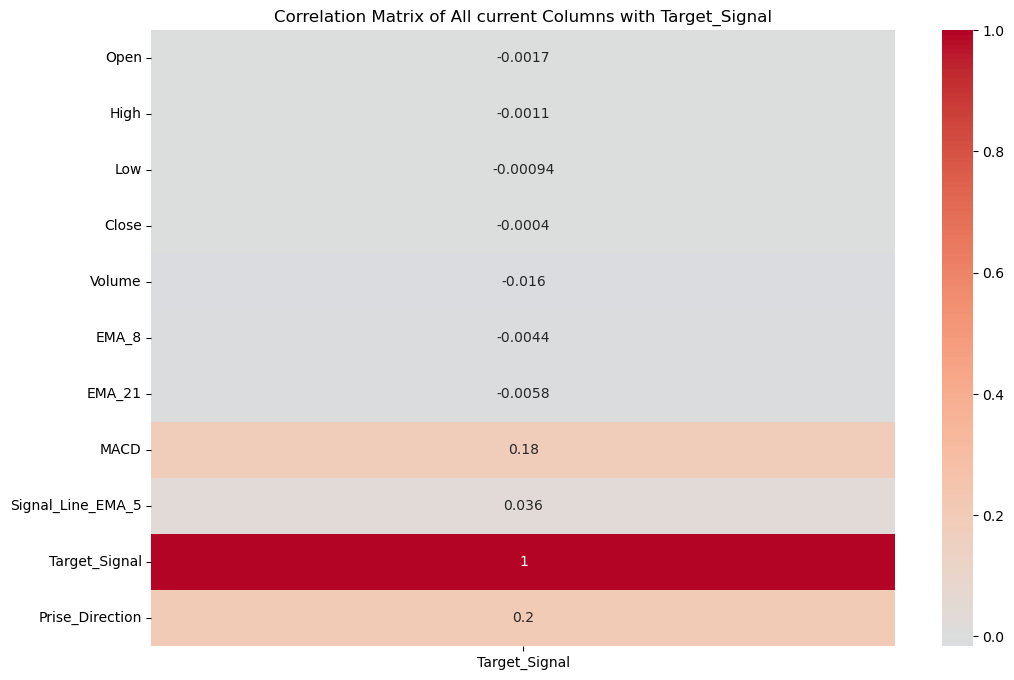

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_w_macd.corr()[['Target_Signal']], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of All current Columns with Target_Signal')

As we can see, just the base columns are almost useless if we want to  
achieve high accuracy for our future model, so let's start **Feature Engineering**

--------------------------------------

### Adding more features, so our future model can find correlations easier

- We will now direct our attention to **technical indicators** within our feature engineering   
strategy in order **to integrate more applicable features into the feature matrix**. 
- It's going to be fascinating to investigate which characteristics of a **digital asset**, if any,  
impact the model's performance.

In [79]:
def add_technical_indicators(df):
    """
    Adds the following technical indicators to a given DataFrame:
    - SMA (8, 21, 50, 200)
    - RSI (10, 14, 30)
    - ROC (10, 14)
    - Momentum (14)
    - Stochastic %K, %D (14, 3) and (200, 3)
    - Bollinger Bands (20,2)

    Assumes DataFrame contains 'Close', 'High', and 'Low' columns.
    """

    # Simple Moving Averages
    for period in [8, 21, 50, 200]:
        df[f'SMA_{period}'] = df['Close'].rolling(window=period, min_periods=1).mean()

    # Relative Strength Index (RSI)
    def calculate_rsi(df, period=14):
        delta = df['Close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)

        avg_gain = gain.ewm(span=period, adjust=False, min_periods=1).mean()
        avg_loss = loss.ewm(span=period, adjust=False, min_periods=1).mean()

        rs = avg_gain / (avg_loss + 1e-10)  # Prevent division by zero
        return 100 - (100 / (1 + rs))

    for period in [10, 14, 30]:
        df[f'RSI_{period}'] = calculate_rsi(df, period)

    # Rate of Change (ROC)
    for period in [10, 14]:
        df[f'ROC_{period}'] = df['Close'].pct_change(periods=period) * 100

    # Momentum
    df['Momentum_14'] = df['Close'].diff(14)

    # Stochastic Oscillators
    def stochastic_k(df, period=14):
        low_min = df['Low'].rolling(window=period, min_periods=1).min()
        high_max = df['High'].rolling(window=period, min_periods=1).max()
        return ((df['Close'] - low_min) / (high_max - low_min)) * 100

    # Fast stochastic (short-term)
    df['Stoch_%K_14'] = stochastic_k(df, 14)
    df['Stoch_%D_14'] = df['Stoch_%K_14'].rolling(window=3, min_periods=1).mean()

    # Slow stochastic (long-term)
    df['Stoch_%K_200'] = stochastic_k(df, 200)
    df['Stoch_%D_200'] = df['Stoch_%K_200'].rolling(window=3, min_periods=1).mean()

    # Bollinger Bands (20, 2)
    rolling_mean = df['Close'].rolling(window=20, min_periods=1).mean()
    rolling_std = df['Close'].rolling(window=20, min_periods=1).std()

    df['BB_Upper'] = rolling_mean + (2 * rolling_std)
    df['BB_Lower'] = rolling_mean - (2 * rolling_std)

    return df


# Add technical indicators to the DataFrame
df_add_feat = add_technical_indicators(df_w_macd)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23728\2513271651.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23728\2513271651.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23728\2513271651.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [80]:
df_add_feat.head()

,Open,High,Low,Close,Volume,EMA_8,EMA_21,MACD,Signal_Line_EMA_5,Target_Signal,...,RSI_30,ROC_10,ROC_14,Momentum_14,Stoch_%K_14,Stoch_%D_14,Stoch_%K_200,Stoch_%D_200,BB_Upper,BB_Lower
Open time,,,,,,,,,,,,,,,,,,,,,
2024-09-12 16:02:00,2323.59,2326.78,2323.58,2326.78,91.7050,2326.780000,2326.780000,0.000000,0.000000,1.0,...,0.000000,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,NaN,NaN
2024-09-12 16:03:00,2326.77,2327.04,2326.20,2326.82,113.4817,2326.788889,2326.783636,0.005253,0.001751,1.0,...,99.999996,NaN,NaN,NaN,93.641618,96.820809,93.641618,96.820809,2326.856569,2326.743431
2024-09-12 16:04:00,2326.83,2327.46,2326.82,2327.46,131.0081,2326.938025,2326.845124,0.092901,0.032134,1.0,...,100.000000,NaN,NaN,NaN,100.000000,97.880539,100.000000,97.880539,2327.783151,2326.256849
2024-09-12 16:05:00,2327.46,2328.05,2325.60,2325.66,140.2757,2326.654019,2326.737385,-0.083366,-0.006366,0.0,...,26.038994,NaN,NaN,NaN,46.532438,80.058019,46.532438,80.058019,2328.175950,2325.184050
2024-09-12 16:06:00,2325.66,2328.53,2325.52,2328.05,111.2175,2326.964237,2326.856714,0.107523,0.031597,1.0,...,63.917316,NaN,NaN,NaN,90.303030,78.945156,90.303030,78.945156,2328.737233,2325.170767


In [81]:
df_add_feat.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Volume                0
EMA_8                 0
EMA_21                0
MACD                  0
Signal_Line_EMA_5     0
Target_Signal         0
Prise_Direction       0
SMA_8                 0
SMA_21                0
SMA_50                0
SMA_200               0
RSI_10                0
RSI_14                0
RSI_30                0
ROC_10               10
ROC_14               14
Momentum_14          14
Stoch_%K_14           0
Stoch_%D_14           0
Stoch_%K_200          0
Stoch_%D_200          0
BB_Upper              1
BB_Lower              1
dtype: int64

In [82]:
# We have some missing values since some functions didn't have 
# Enough values to build an average, all these Null values are from
# The beginning and we can't really do anything about them but drop.
df_add_feat = df_add_feat.dropna(axis=0)

In [83]:
df_add_feat.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume               0
EMA_8                0
EMA_21               0
MACD                 0
Signal_Line_EMA_5    0
Target_Signal        0
Prise_Direction      0
SMA_8                0
SMA_21               0
SMA_50               0
SMA_200              0
RSI_10               0
RSI_14               0
RSI_30               0
ROC_10               0
ROC_14               0
Momentum_14          0
Stoch_%K_14          0
Stoch_%D_14          0
Stoch_%K_200         0
Stoch_%D_200         0
BB_Upper             0
BB_Lower             0
dtype: int64

In [84]:
df_add_feat['Target_Signal'] = df_add_feat.pop('Target_Signal')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23728\2857607741.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
df_add_feat.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,208786.0,3068.088009,490.315096,2179.520000,2597.682500,3176.480000,3400.057500,4104.270000
High,208786.0,3069.705331,490.697732,2258.190000,2599.037500,3178.800000,3402.000000,4107.800000
Low,208786.0,3066.437403,489.918248,2125.010000,2596.392500,3174.020000,3398.290000,4097.140000
Close,208786.0,3068.090080,490.312960,2179.520000,2597.682500,3176.470000,3400.040000,4104.270000
Volume,208786.0,326.766213,569.731323,0.463100,84.931100,171.476000,353.245250,24552.486200
EMA_8,208786.0,3068.082490,490.302871,2260.928590,2597.809802,3176.325021,3400.247267,4092.811714
EMA_21,208786.0,3068.068227,490.288757,2266.153253,2597.716398,3176.730369,3400.200673,4082.510004
MACD,208786.0,0.014263,3.570276,-110.623757,-1.412351,0.038878,1.523668,39.276568
Signal_Line_EMA_5,208786.0,0.014281,3.434285,-96.370732,-1.363755,0.033934,1.469446,36.001909
Prise_Direction,208786.0,0.497394,0.499994,0.000000,0.000000,0.000000,1.000000,1.000000


#### Let's explore new fetures that we added!

In [86]:
df_viz = pd.DataFrame(df_add_feat.iloc[index_viz:].copy())

In [87]:
df_viz.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_8', 'EMA_21', 'MACD',
       'Signal_Line_EMA_5', 'Prise_Direction', 'SMA_8', 'SMA_21', 'SMA_50',
       'SMA_200', 'RSI_10', 'RSI_14', 'RSI_30', 'ROC_10', 'ROC_14',
       'Momentum_14', 'Stoch_%K_14', 'Stoch_%D_14', 'Stoch_%K_200',
       'Stoch_%D_200', 'BB_Upper', 'BB_Lower', 'Target_Signal'],
      dtype='object')

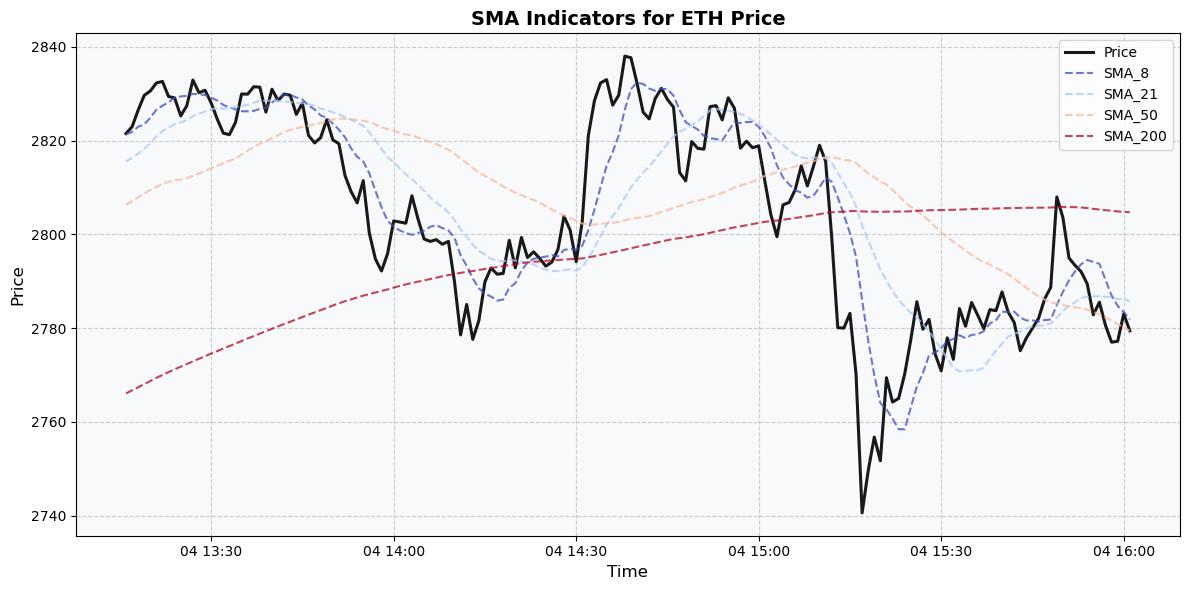

In [88]:
def plot_price_related_indicators(df, indicators, title=' '):
    
    """
    Plots the price along with multiple indicators (e.g., SMA, EMA, Bollinger Bands).

    Parameters:
    - df (pd.DataFrame): DataFrame containing 'Close' and indicator columns.
    - indicators (list): List of indicator column names.
    - title (str): Title of the plot.
    """

    plt.figure(figsize=(12, 6))

    # Plot the Close price first
    sns.lineplot(
        data=df, x=df.index, y='Close',
        label='Price', color='black', linewidth=2.2, alpha=0.9
    )

    # Generate distinct colors for each indicator
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(indicators)))

    for i, col in enumerate(indicators):
        sns.lineplot(
            data=df, x=df.index, y=col,
            label=col, color=colors[i],
            alpha=0.75, linestyle='dashed' if "SMA" in col else 'solid'
        )

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Price", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().set_facecolor('#f8f9fa')
    plt.tight_layout()
    plt.show()


# Define the indicators to plot (here: All SMAs we have)
indicators_to_plot = ['SMA_8', 'SMA_21', 'SMA_50', 'SMA_200']
title = 'SMA Indicators for ETH Price'
# Plot the price and indicators
plot_price_related_indicators(df_viz, indicators=indicators_to_plot, title=title)

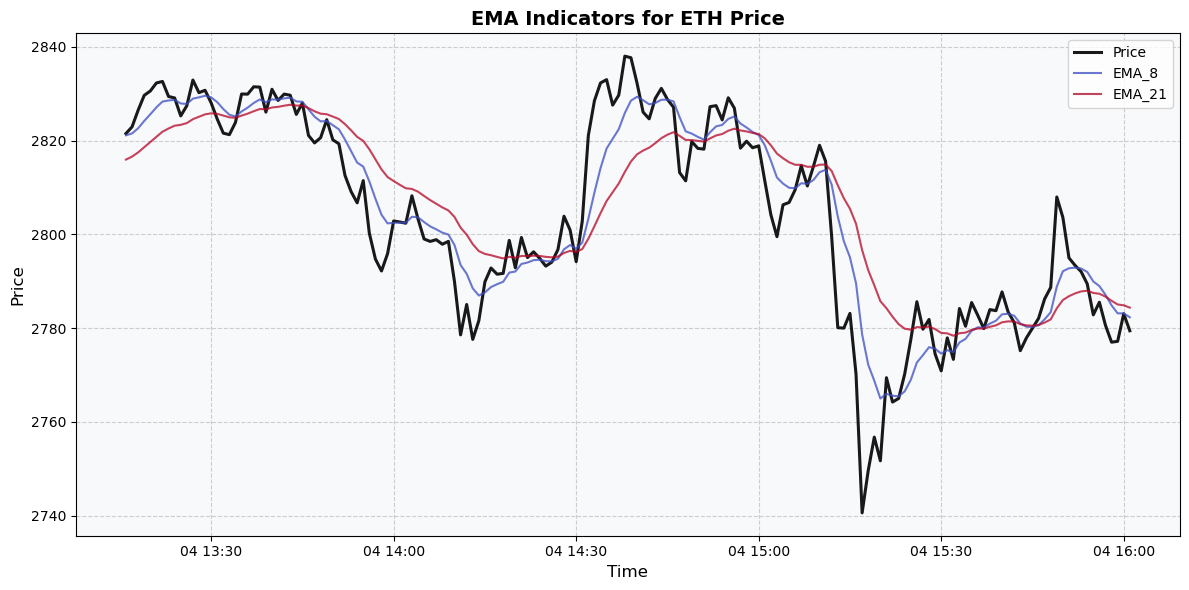

In [89]:
# Define the indicators to plot (here: EMAs)
indicators_to_plot = ['EMA_8', 'EMA_21']

# Plot the price and indicators
plot_price_related_indicators(df_viz, indicators=indicators_to_plot, title='EMA Indicators for ETH Price')

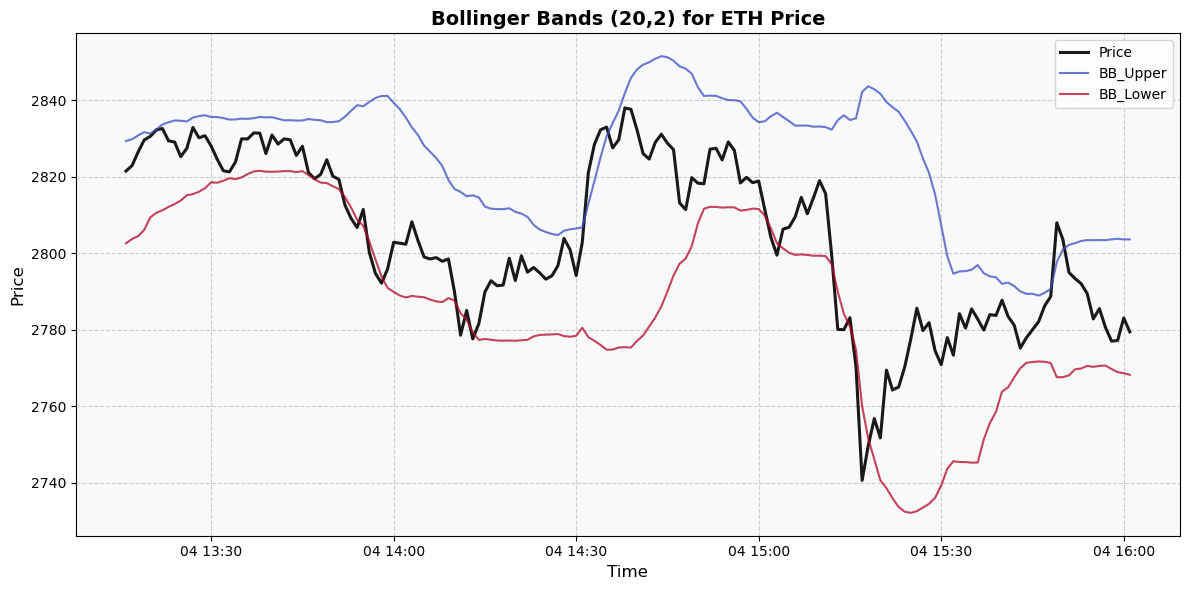

In [90]:
# Define the indicators to plot (here: Bollinger Bands (20,2))
indicators_to_plot = ['BB_Upper', 'BB_Lower']

# Plot the price and indicators
plot_price_related_indicators(df_viz, indicators=indicators_to_plot, title='Bollinger Bands (20,2) for ETH Price')

In [91]:
# Now, moving to Independent Indicators
def plot_independent_indicators(df, indicators):
    """
    Plots multiple independent indicators on the same axes with improved styling.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - indicators (list): List of column names representing technical indicators.
    """
    plt.figure(figsize=(12, 6))

    colors = plt.cm.tab10.colors  # Get distinct colors
    num_indicators = len(indicators)

    for i, indicator in enumerate(indicators):
        sns.lineplot(
            data=df, x=df.index, y=indicator, 
            label=indicator, color=colors[i % len(colors)], 
            alpha=0.8, linestyle='dashed' if i % 2 == 0 else 'solid'
        )

    plt.title(f"Independent Technical Indicators, here: {indicators}")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().set_facecolor('#f8f9fa') 
    plt.show()

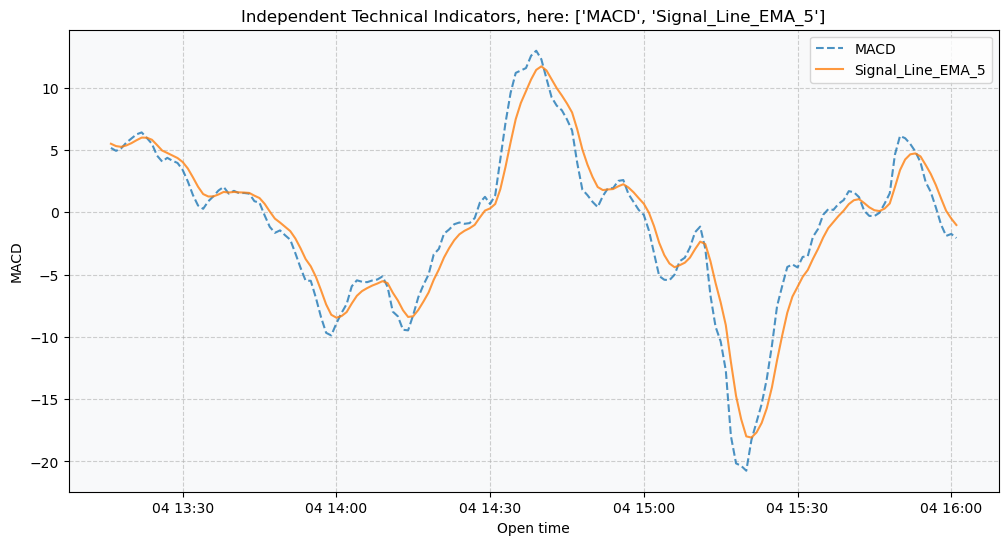

In [92]:

independent_indicators = ['MACD', 'Signal_Line_EMA_5']

plot_independent_indicators(df_viz, indicators=independent_indicators)

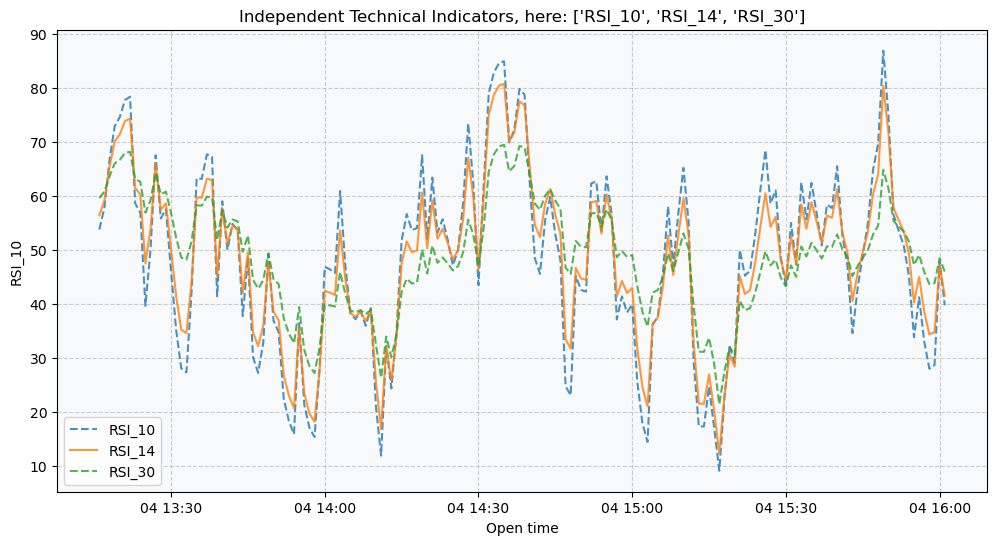

In [93]:
independent_indicators = ['RSI_10', 'RSI_14', 'RSI_30']

plot_independent_indicators(df_viz, indicators=independent_indicators)

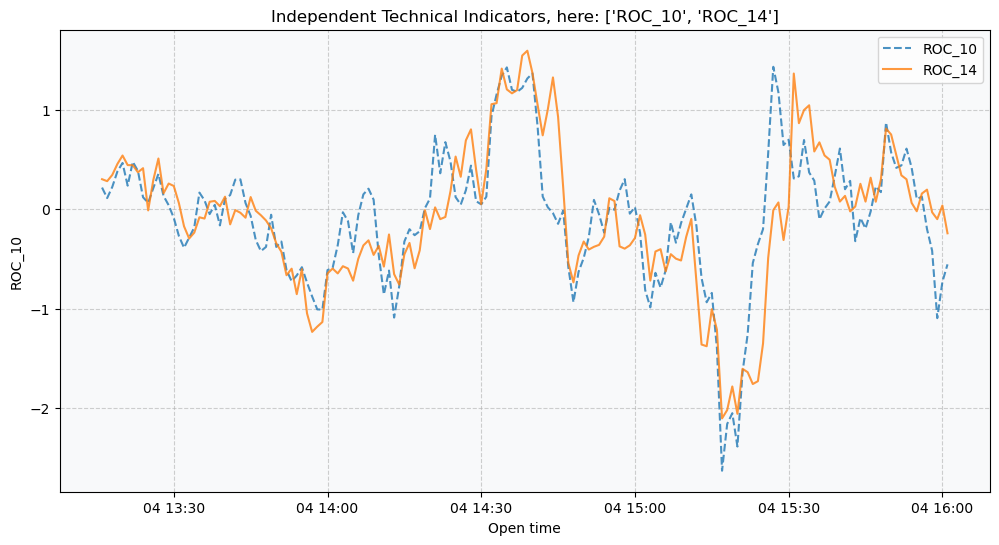

In [94]:
independent_indicators = ['ROC_10', 'ROC_14']

plot_independent_indicators(df_viz, indicators=independent_indicators)

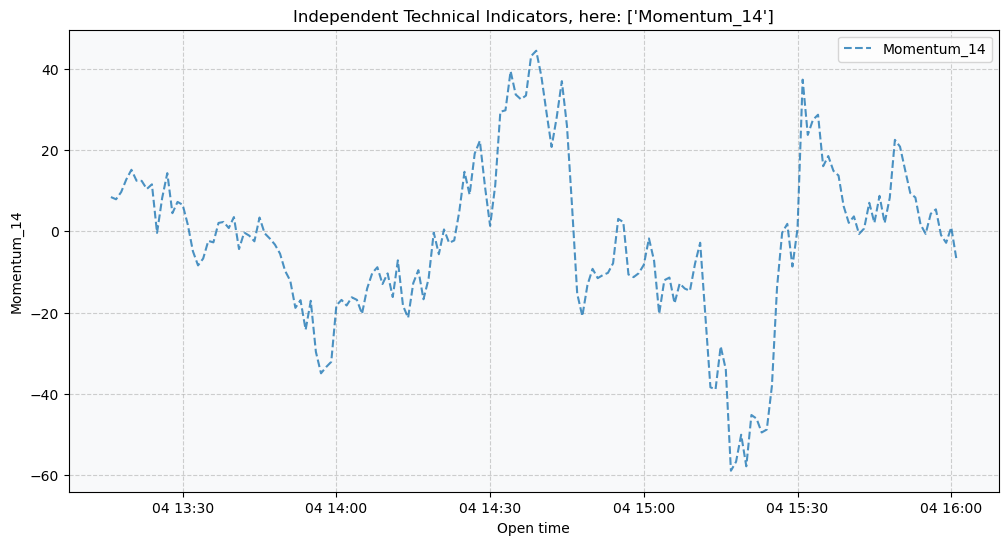

In [95]:
independent_indicators = ['Momentum_14']

plot_independent_indicators(df_viz, indicators=independent_indicators)

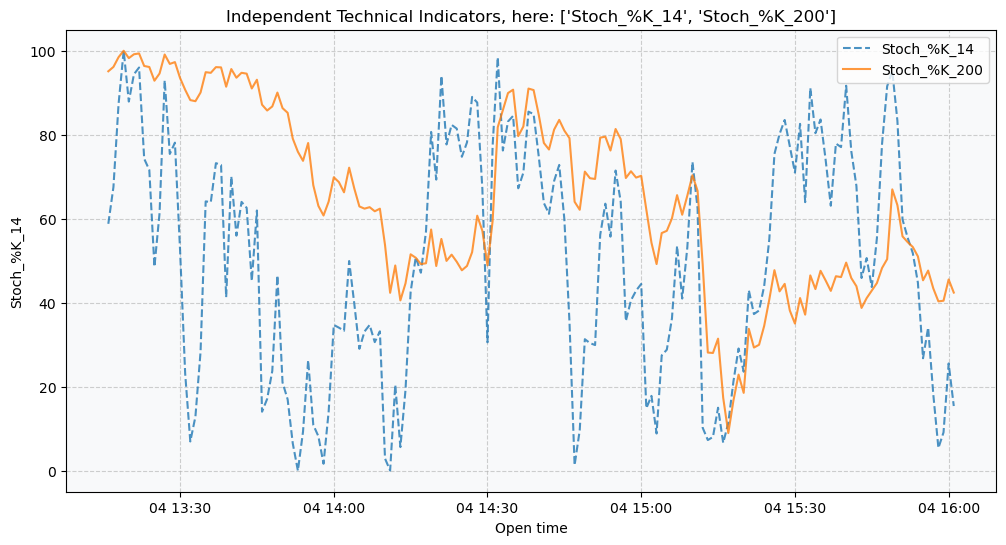

In [96]:
# And finally, the Stochastic Oscillators, Slow

independent_indicators = ['Stoch_%K_14', 'Stoch_%K_200']

plot_independent_indicators(df_viz, indicators=independent_indicators)

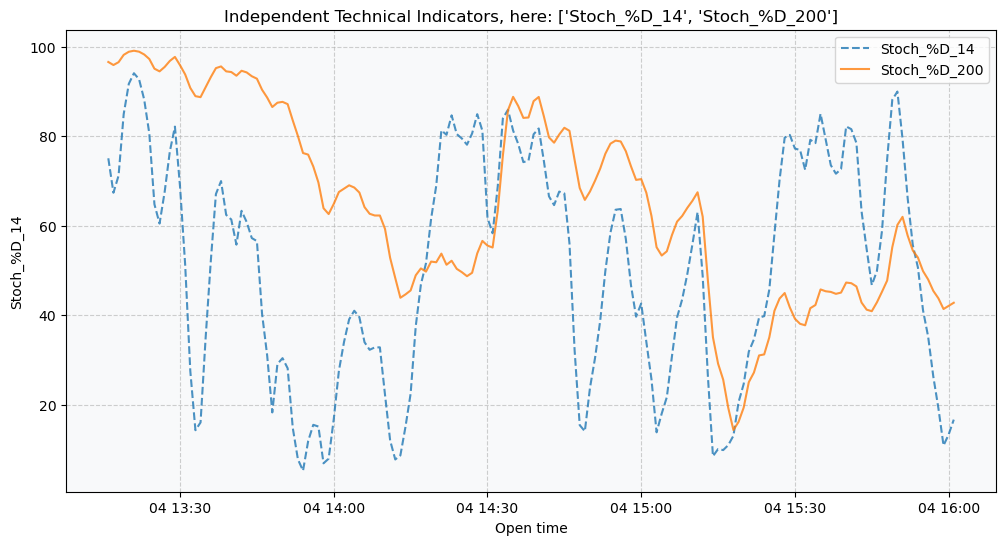

In [97]:
# And finally, the Stochastic Oscillators, Fast

independent_indicators = ['Stoch_%D_14', 'Stoch_%D_200']

plot_independent_indicators(df_viz, indicators=independent_indicators)

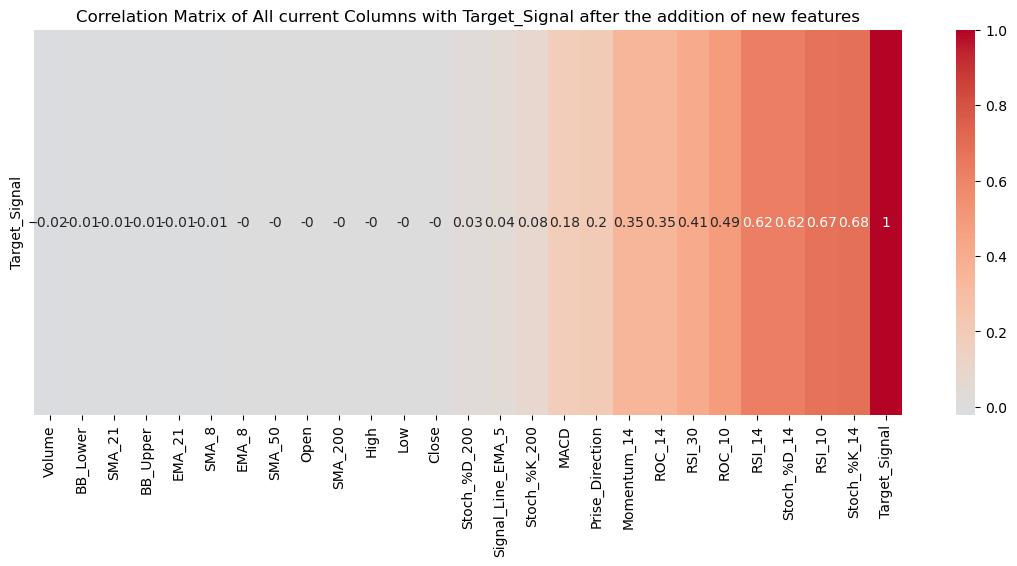

In [98]:
# Let's examine the correlations now that we have added many new features.
correlations = df_add_feat.corr()[['Target_Signal']].sort_values(by=df_add_feat.columns[-1])

plt.figure(figsize=(14, 5))
sns.heatmap(correlations.T.round(2), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of All current Columns with Target_Signal after the addition of new features');

------------------------------------


#### After a short analysis of the resulting graphs we can see, that some of the features (mostly ones that we added during this feature engineering part) in our current dataset are drastically **more effective** compared to others.
  
##### So let's work on our feature matrix to remove columns from where we can't extract useful for our future model information.

In [99]:
df_all_feat = df_add_feat.copy()
df_all_feat['Target_Signal'] = df_all_feat.pop('Target_Signal')
# Saving dataframe with all features and target signal in case we need it later to 'main_data'
df_all_feat.to_csv('C:\Program Files (x86)\python_programms\Crypto_Project_ML\main_data\All_features.csv', 
                   index=True, date_format='%Y-%m-%d %H:%M:%S')

In [100]:
# We now have a lot of columns (features)!(
len(df_add_feat.columns)

27

I guess there are some options for how we can reduce this number of col.:
- We can simply drop ones that don't correlate with our target much.
- We can also try some Dimensionality Reduction Techniques, but then the results of our future model  
would be hard to interpret.

So for now, **let's just drop some of the columns**.  
And after the creation of our first elementary models, we can come back to this problem.  
Maybe models would train fast enough and treat all the features as important. (impossible)

In [101]:
df_add_feat.corr()['Target_Signal'].sort_values(ascending=False)
# We can see that one more time:

Target_Signal        1.000000
Stoch_%K_14          0.678523
RSI_10               0.673049
Stoch_%D_14          0.624973
RSI_14               0.620156
ROC_10               0.485254
RSI_30               0.414033
ROC_14               0.347893
Momentum_14          0.346388
Prise_Direction      0.204618
MACD                 0.181752
Stoch_%K_200         0.076474
Signal_Line_EMA_5    0.036259
Stoch_%D_200         0.034727
Close               -0.000358
Low                 -0.000895
High                -0.001037
SMA_200             -0.001465
Open                -0.001643
SMA_50              -0.004056
EMA_8               -0.004385
SMA_8               -0.005426
EMA_21              -0.005709
BB_Upper            -0.006844
SMA_21              -0.006993
BB_Lower            -0.007297
Volume              -0.016138
Name: Target_Signal, dtype: float64

In [102]:
to_drop = ['Open', 'High', 'Low', 'Volume', 'SMA_8', 'SMA_21', 'BB_Upper', 'BB_Lower', 'MACD', 'Signal_Line_EMA_5']
# We drop most of our base columns and some of the features that 
# are not correlated with our target signal, or as it is with SMA_8 and SMA_21
# they are similar to EMAs that we kept.
# Also drop the comuns we used to create the target signal
df_add_feat = df_add_feat.drop(to_drop, axis=1)

Let's finish this notebook by saving our final dataset.

In [103]:
df_add_feat.to_csv('C:\Program Files (x86)\python_programms\Crypto_Project_ML\main_data\Final_Data_ETH.csv', 
                   index=True, date_format='%Y-%m-%d %H:%M:%S')

-----------------------
